# **Segmentación de clientes**

"Más allá de los números: Cómo la segmentación impulsa el crecimiento"

"Los datos de nuestros clientes son un tesoro oculto que puede revelar información valiosa sobre nuestro negocio. ¿Cómo podemos aprovechar al máximo esta información? La segmentación de clientes nos permite identificar oportunidades de crecimiento, optimizar la asignación de recursos y mejorar la rentabilidad. En este taller, aprenderemos a utilizar el algoritmo K-means para segmentar clientes y tomar decisiones de negocio más inteligentes."

Datos: sintéticos

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6d0d61f0e52327fede0459a0a08c7f12e2c419c13771ffe129ce0260177a7607
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


# Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Abriendo archivo

In [ ]:
url= "https://drive.google.com/file/d/1I0DFex3Cs6WwRGHG4J1Pn0I5_rcR91cN/view?usp=drive_link"
#url='https://raw.githubusercontent.com/foramirez50/introduccion/refs/heads/master/segmentacionEmpresas.csv?token=GHSAT0AAAAAAC2QDTTSDKVB2LQE7N23GI6MZZXK3IA'

df = pd.read_csv('/content/segmentacionEmpresas.csv', sep=";")
#df = pd.read_csv(url, sep=';')
df.head()

,Empresa,organizacion_juridica,ciudad,Ganancias_netas,score_gasto,sector
0,emp1,Limitada,Cartagena,10994,8795.2,Comercio
1,emp2,Limitada,Medellin,11134,500.0,Agro
2,emp3,Limitada,Medellin,7486,5988.8,Agro
3,emp4,Sociedad por Acciones Simplificada,Santa Marta,8538,6830.4,Energetico
4,emp5,Limitada,Villavicencio,4480,448.0,Construccion


# Análisis exploratorio de datos

In [ ]:
df.columns

Index(['Empresa', 'organizacion_juridica', 'ciudad', 'Ganancias_netas',
       'score_gasto', 'sector'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Empresa                198 non-null    object 
 1   organizacion_juridica  198 non-null    object 
 2   ciudad                 198 non-null    object 
 3   Ganancias_netas        198 non-null    int64  
 4   score_gasto            198 non-null    float64
 5   sector                 198 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.4+ KB


In [ ]:
df.describe()

,Ganancias_netas,score_gasto
count,198.000000,198.000000
mean,7592.333333,4063.216970
std,4598.120244,4058.247092
min,84.000000,0.000000
25%,3355.250000,680.400000
50%,7379.000000,2353.200000
75%,11662.500000,7877.385000
max,14979.000000,13176.900000


In [ ]:
df.isnull().sum()

,0
Empresa,0
organizacion_juridica,0
ciudad,0
Ganancias_netas,0
score_gasto,0
sector,0


## Análisis estadístico de las variables

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.duplicated().any()

False

In [ ]:
df1 = df.drop(columns=['Empresa'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   organizacion_juridica  198 non-null    object 
 1   ciudad                 198 non-null    object 
 2   Ganancias_netas        198 non-null    int64  
 3   score_gasto            198 non-null    float64
 4   sector                 198 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


# Calculando el número de clústeres óptimo

**¿Qué es la inercia en K-means?**

La inercia es una métrica que se utiliza en el algoritmo K-means para evaluar la calidad de la agrupación realizada. En términos simples, la inercia mide qué tan bien se encuentran agrupados los datos.

Distancia de los puntos a los centroides:

Imagina que cada grupo formado por K-means tiene un centro, llamado centroide. La inercia calcula la suma de las distancias al cuadrado de cada punto de datos a su centroide más cercano.

Minimizar la inercia:

El objetivo del algoritmo K-means es encontrar los centroides que minimicen esta suma de distancias al cuadrado. Es decir, busca agrupar los datos de manera que los puntos dentro de cada grupo estén lo más cerca posible de su centroide.
¿Por qué es importante la inercia?

Evaluación de la agrupación:

La inercia nos permite comparar diferentes agrupaciones y elegir la que tenga un valor de inercia más bajo. Una inercia baja indica que los grupos son compactos y bien separados.
Selección del número óptimo de clusters (K):

Al variar el número de clusters (K) y calcular la inercia para cada valor de K, podemos encontrar el valor de K que produce la menor inercia, lo que sugiere una buena agrupación. Sin embargo, es importante tener en cuenta que una inercia muy baja podría indicar sobreajuste.

In [ ]:
# Calculando la inercia para la segmentación

X1 = df[['Ganancias_netas' , 'score_gasto']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

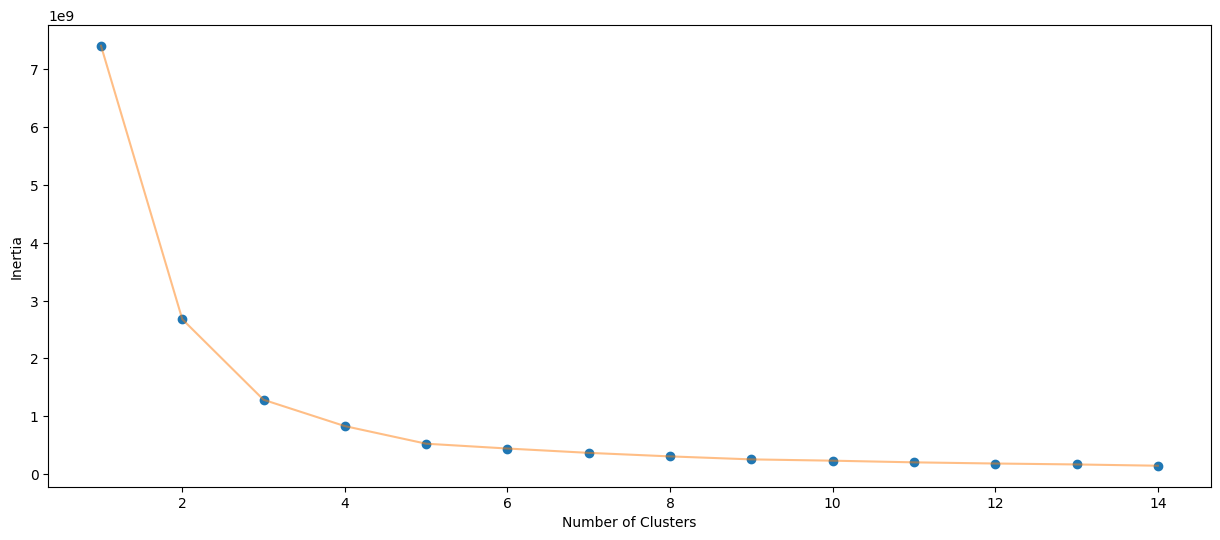

In [ ]:
# Gráfico de codo para saber cual es el número de clusters óptimo

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Entrenando el modelo de Segmentación

In [ ]:
# entrenamiento del modelo de segmentación
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=111)
y_kmeans= kmeansmodel.fit_predict(X1)

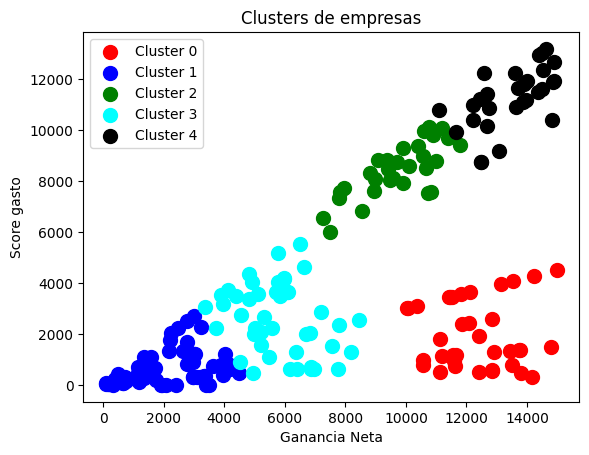

In [ ]:
# Gráfica diferenciada por colores y clústeres
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 4, 0], X1[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(algorithm.cluster_centers_[:, 0], algorithm.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters de empresas')
plt.xlabel('Ganancia Neta')
plt.ylabel('Score gasto')
plt.legend()
plt.show()

In [ ]:
df1['cluster']= pd.DataFrame(y_kmeans)

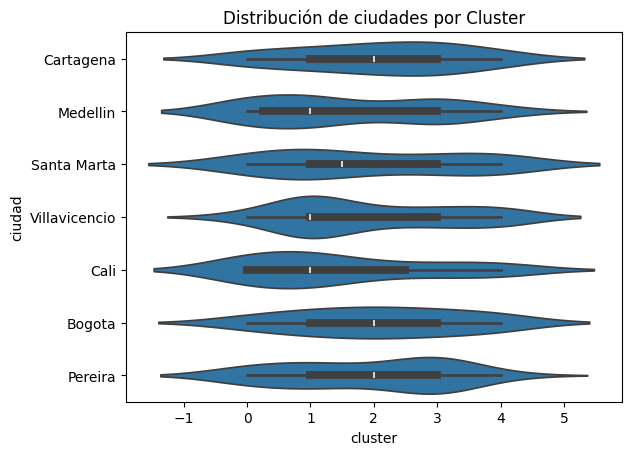

In [ ]:
# Gráfica de violín para identificar los clústers vs las ciudades

df['cluster'] = y_kmeans  # Assign the cluster labels to the 'cluster' column of df

sns.violinplot(x='cluster', y='ciudad', data=df)
plt.title('Distribución de ciudades por Cluster')
plt.show()

Nótese que en está gráfica se deducir qué ciudades necesitan más atención en los equipos de qué clústeres.

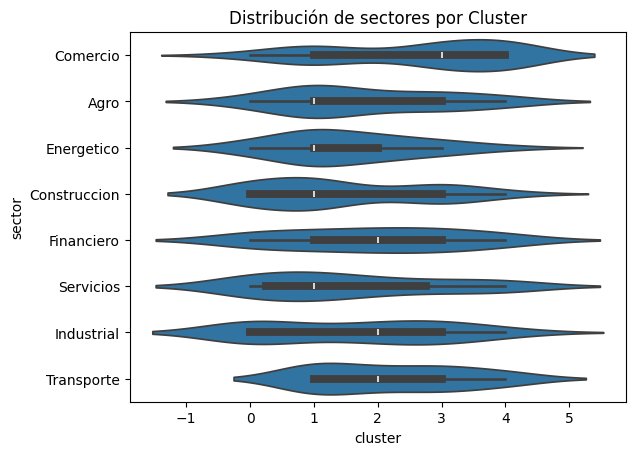

In [ ]:
sns.violinplot(x='cluster', y='sector', data=df)
plt.title('Distribución de sectores por Cluster')
plt.show()

En esta gráfica se puede ver qué sectores puedo atacar y cuales serían más rentables, dependiendo el cluster

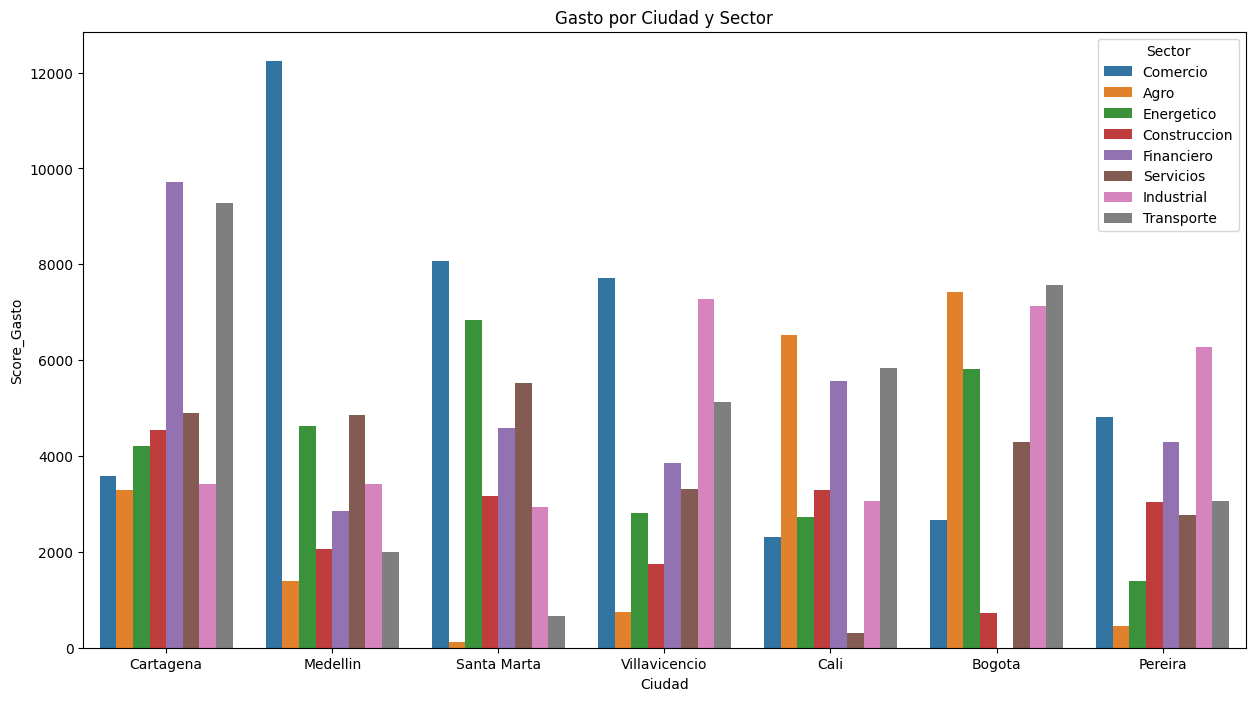

In [ ]:
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(15, 8))  # Create Figure and Axes with desired size
sns.barplot(x='ciudad', y='score_gasto', hue='sector', data=df, ax=ax, ci=None) # Pass the ax to the barplot function

# Personalizar el gráfico
plt.title('Gasto por Ciudad y Sector')
plt.xlabel('Ciudad')
plt.ylabel('Score_Gasto')
plt.legend(title='Sector')
plt.show()

# Resultado

In [ ]:
df1.head(30)

,organizacion_juridica,ciudad,Ganancias_netas,score_gasto,sector,cluster
0,Limitada,Cartagena,10994,8795.20,Comercio,2
1,Limitada,Medellin,11134,500.00,Agro,0
2,Limitada,Medellin,7486,5988.80,Agro,2
3,Sociedad por Acciones Simplificada,Santa Marta,8538,6830.40,Energetico,2
4,Limitada,Villavicencio,4480,448.00,Construccion,1
5,Sociedad por Acciones Simplificada,Medellin,6686,2005.80,Construccion,3
6,Sociedad por Acciones Simplificada,Santa Marta,10649,8519.20,Financiero,2
7,Limitada,Cali,9911,7928.80,Agro,2
8,Sociedad por Acciones Simplificada,Bogota,4951,448.00,Comercio,3
9,Limitada,Cali,11376,9669.60,Agro,2


In [ ]:
df1.to_excel('output.xlsx')